# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [5]:
# Your code here

df = pd.read_csv("data/ames.csv", index_col=0)

The following code checks that you loaded the data correctly:

In [7]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [8]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [9]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

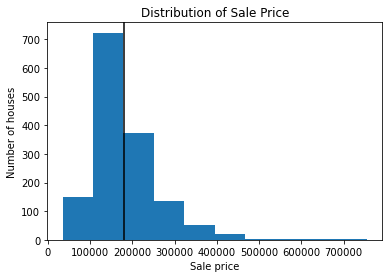

In [94]:
# Your code here

ax = df["SalePrice"].plot(kind="hist")
ax.set_title("Distribution of Sale Price")
ax.set_xlabel("Sale price")
ax.set_ylabel("Number of houses")
ax.axvline(x=df["SalePrice"].mean(), ymin=0, ymax=700, color='black')
plt.show()

Now, print out the mean, median, and standard deviation:

In [84]:
# Your code here

print("The mean of SalePrice variable is:", df['SalePrice'].mean())
print("The median of SalePrice variable is:", df['SalePrice'].median())
print("The standard deviation of SalePrice variable is:", df['SalePrice'].std())

The mean of SalePrice variable is: 180921.19589041095
The median of SalePrice variable is: 163000.0
The standard deviation of SalePrice variable is: 79442.50288288662


In the cell below, interpret the above information.

In [78]:
# Replace None with appropriate text
"""
The mean and median provide statistics in terms of central tendency of the distribution of sale prices.
A mean of 180,921 tells us that the average sale price of homes in this dataset is approximately 180,921.
The mean however is normally affected by presence of outliers, therefore it may not be the best representation
of the 'typical value'.

A median of 163,000 tells us that half of the homes in the dataset sold for a price at or below 163,000
and half sold for a price above 163,000. The median is often considered a more accurate 
measure of central tendency than the mean because it is not as heavily influenced by outliers in the data.

The standard deviation shows how much dispersed the sale prices are from the mean.
A standard deviation of 79,442 indicates that the Sale Price values are quite variable, and that there is
a relatively wide range of prices for the homes in this dataset.
"""

"\nThe mean and median provide statistics in terms of central tendency of the distribution of sale prices.\nA mean of 180,921 tells us that the average sale price of homes in this dataset is approximately 180,921.\nThe mean however is normally affected by presence of outliers, therefore it may not be the best representation\nof the 'typical value'.\n\nA median of 163,000 tells us that half of the homes in the dataset sold for a price at or below 163,000\nand half sold for a price above 163,000. The median is often considered a more accurate \nmeasure of central tendency than the mean because it is not as heavily influenced by outliers in the data.\n\nThe standard deviation shows how much dispersed the sale prices are from the mean.\nA standard deviation of 79,442 indicates that the Sale Price values are quite variable, and that there is\na relatively wide range of prices for the homes in this dataset.\n"

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

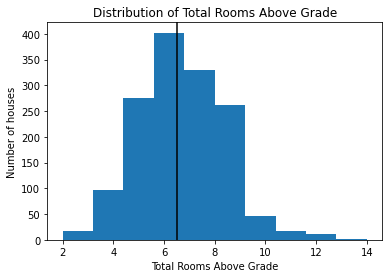

In [95]:
# Your code here

ax = df["TotRmsAbvGrd"].plot(kind="hist")
ax.set_title("Distribution of Total Rooms Above Grade")
ax.set_xlabel("Total Rooms Above Grade")
ax.set_ylabel("Number of houses")
ax.axvline(x=df["TotRmsAbvGrd"].mean(), ymin=0, ymax=400, color="black")
plt.show()

Now, print out the mean, median, and standard deviation:

In [86]:
# Your code here

print("The mean of TotRmsAbvGrd variable is:", df['TotRmsAbvGrd'].mean())
print("The median of TotRmsAbvGrd variable is:", df['TotRmsAbvGrd'].median())
print("The standard deviation of TotRmsAbvGrd variable is:", df['TotRmsAbvGrd'].std())

The mean of TotRmsAbvGrd variable is: 6.517808219178082
The median of TotRmsAbvGrd variable is: 6.0
The standard deviation of TotRmsAbvGrd variable is: 1.6253932905840505


In the cell below, interpret the above information.

In [92]:
# Replace None with appropriate text
"""
The mean of 6.517 and the median of 6 suggest that the Distribution of Home sales by 
total rooms above grade is roughly normally distributed, and that the majority of
the data points are located around here.
The standard deviation of 1.625 suggests that the data is lightly skewed, 
and most of the values fall within one or two standard deviations of the mean.
"""

'\nThe mean of 6.517 and the median of 6 suggest that the Distribution of Home sales by \ntotal rooms above grade is roughly normally distributed, and that the majority of\nthe data points are located around here.\nThe standard deviation of 1.625 suggests that the data is lightly skewed, \nand most of the values fall within one or two standard deviations of the mean.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

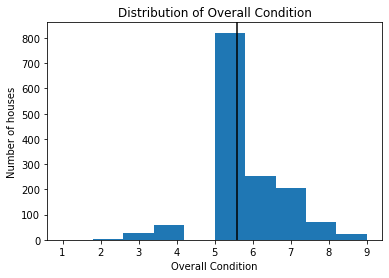

In [96]:
# Your code here

ax = df["OverallCond"].plot(kind="hist")
ax.set_title("Distribution of Overall Condition")
ax.set_xlabel("Overall Condition")
ax.set_ylabel("Number of houses")
ax.axvline(x=df["OverallCond"].mean(), ymin=0, ymax=800, color="black")
plt.show()

Now, print out the mean, median, and standard deviation:

In [90]:
# Your code here

print("The mean of OverallCond variable is:", df['OverallCond'].mean())
print("The median of OverallCond variable is:", df['OverallCond'].median())
print("The standard deviation of OverallCond variable is:", df['OverallCond'].std())

The mean of OverallCond variable is: 5.575342465753424
The median of OverallCond variable is: 5.0
The standard deviation of OverallCond variable is: 1.1127993367127316


In the cell below, interpret the above information.

In [91]:
# Replace None with appropriate text
"""
The mean of 5.575 and the median of 5 suggest that the Distribution of Home sales by 
total rooms above grade is roughly normally distributed, with the majority of the data
points located at these positions.
The standard deviation of 1.112 suggests that the data is lightly skewed, 
and most of the values fall within one or two standard deviations of the mean.
"""

'\nThe mean of 5.575 and the median of 5 suggest that the Distribution of Home sales by \ntotal rooms above grade is roughly normally distributed, with the majority of the data\npoints located at these positions.\nThe standard deviation of 1.112 suggests that the data is lightly skewed, \nand most of the values fall within one or two standard deviations of the mean.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [46]:
# Replace None with appropriate code

below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]
above_average_condition = df[df["OverallCond"] > 5]

The following code checks that you created the subsets correctly:

In [93]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

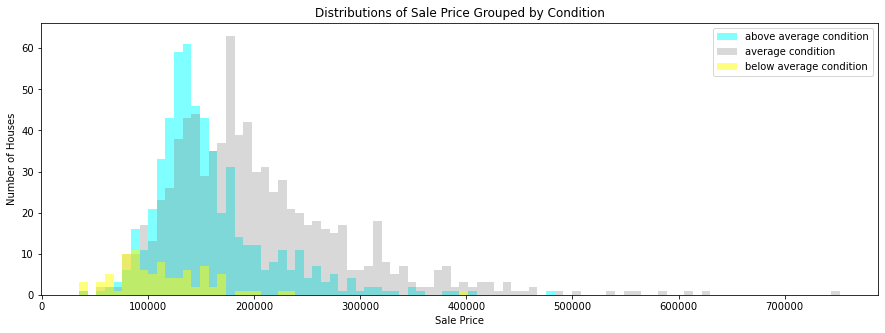

In [48]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [97]:
# Replace None with appropriate text
"""
The histogram plot shows the distribution of Sale Price values for each category of home condition.
The plot indicates that the distribution of Sale Price for each category is right-skewed.
The plot also shows that the distribution of Sale Price varies between different categories of home condition. 
The surprising part is that Homes in average condition tend to sell more than Homes in above average condition for
similar Sale Price. For example, at a Sale Price of $200,000 we can see that 10 homes in above average condition were sold
while 30 homes in average condition were sold.
There is also presence of an outlier at around a Sale Price of $750,000 which happens to be a home in average condition.
Another outlier can be seen at a Sale Price of $400,000 which happens to be a home in below average condition. 
Such outliers warrant further investigations to determine what factors influence their unusual prices.
Additionally, the distribution of Sale Price for homes in above average condition appears to be relatively narrow, 
indicating that home condition is a good predictor of Sale Price.
The plot also shows that there is some overlap in the Sale Price distribution between the above average
and average condition categories.
"""

'\nThe histogram plot shows the distribution of Sale Price values for each category of home condition.\nThe plot indicates that the distribution of Sale Price for each category is right-skewed.\nThe plot also shows that the distribution of Sale Price varies between different categories of home condition. \nThe surprising part is that Homes in average condition tend to sell more than Homes in above average condition for\nsimilar Sale Price. For example, at a Sale Price of $200,000 we can see that 10 homes in above average condition were sold\nwhile 30 homes in average condition were sold.\nThere is also presence of an outlier at around a Sale Price of $750,000 which happens to be a home in average condition.\nAnother outlier can be seen at a Sale Price of $400,000 which happens to be a home in below average condition. \nSuch outliers warrant further investigations to determine what factors influence their unusual prices.\nAdditionally, the distribution of Sale Price for homes in above a

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [51]:
# Your code here

corr_matrix = df.corr()
saleprice_corr = corr_matrix['SalePrice']
highest_corr = saleprice_corr.sort_values(ascending=False)[1]
highest_corr_column = saleprice_corr[saleprice_corr == highest_corr].index[0]
print("Column that is most positively correlated with SalePrice:", highest_corr_column)
print("Pearson correlation coefficient:", highest_corr)

Column that is most positively correlated with SalePrice: OverallQual
Pearson correlation coefficient: 0.7909816005838047


Now, find the ***most negatively correlated*** column:

In [52]:
# Your code here

corr_matrix = df.corr()
saleprice_corr = corr_matrix['SalePrice']
lowest_corr = saleprice_corr.sort_values(ascending=True)[0]  
lowest_corr_column = saleprice_corr[saleprice_corr == lowest_corr].index[0]
print("Column that is most negatively correlated:", lowest_corr_column)
print("Pearson correlation coefficient:", lowest_corr)

Column that is most negatively correlated: KitchenAbvGr
Pearson correlation coefficient: -0.1359073708421417


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

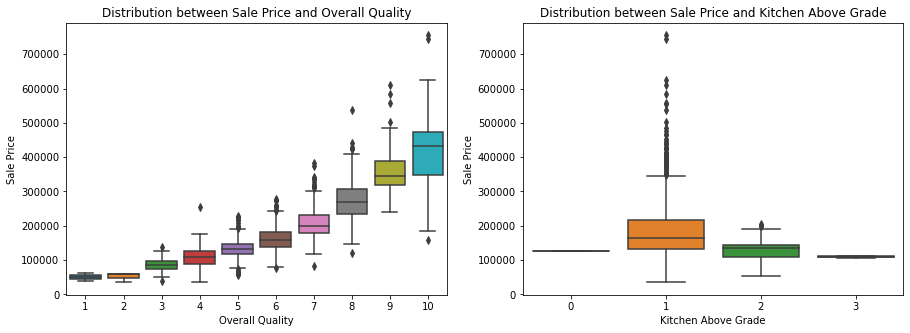

In [60]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Distribution between Sale Price and Overall Quality")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")

ax2.set_title("Distribution between Sale Price and Kitchen Above Grade")
ax2.set_xlabel("Kitchen Above Grade")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [98]:
# Replace None with appropriate text
"""
The left box plot shows the relationship between the Overall Quality variable and Sale Price. 
The box plot suggests that there is a strong positive correlation between Overall Quality and Sale Price.
This is evident since the median Sale Price increases as the Overall Quality score increases.
This therefore means that Overall Quality is a good predictor of SalePrice.
That said, there are interesting outliers, for example homes with an Overall Quality of 10 
being sold at a relatively low sale price.

The right box plot shows the relationship between the Kitchen Above Grade variable and Sale Price. 
The box plot suggests that there is a negative correlation between Kitchen Above Grade and Sale Price.
The median Sale Price decreases as Kitchen Above Grade values increases.
This therefore means that Kitchen Above Grade is not a good enough predictor of SalePrice.
"""

'\nThe left box plot shows the relationship between the Overall Quality variable and Sale Price. \nThe box plot suggests that there is a strong positive correlation between Overall Quality and Sale Price.\nThis is evident since the median Sale Price increases as the Overall Quality score increases.\nThis therefore means that Overall Quality is a good predictor of SalePrice.\nThat said, there are interesting outliers, for example homes with an Overall Quality of 10 \nbeing sold at a relatively low sale price.\n\nThe right box plot shows the relationship between the Kitchen Above Grade variable and Sale Price. \nThe box plot suggests that there is a negative correlation between Kitchen Above Grade and Sale Price.\nThe median Sale Price decreases as Kitchen Above Grade values increases.\nThis therefore means that Kitchen Above Grade is not a good enough predictor of SalePrice.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [61]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

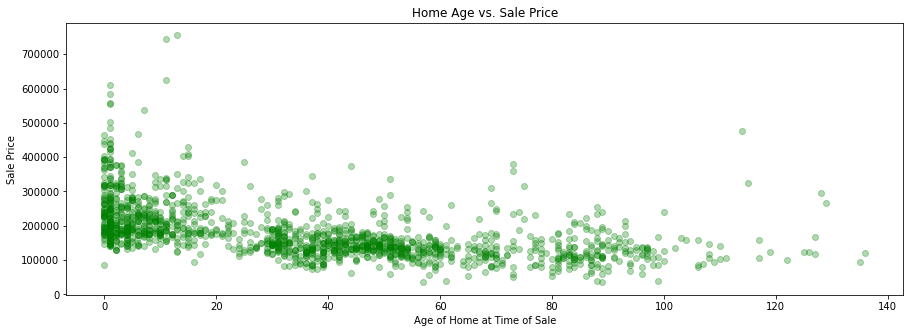

In [62]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [63]:
# Replace None with appropriate text
"""
The scatter plot provides a useful visualization of the relationship between the age of a home and its sale price.
The plot shows that there is a general trend of decreasing sale price as the age of the home increases, which
might be an indication of a weak negative correlation, although there is a lot of variation in the data.
There are also some outliers in the data, such as homes that are relatively old but still have a high sale price,
or even homes that are relatively new but have a low sale price.
These outliers can be subjected to further investigation to determine what factors are contributing 
to their unexpected sale prices.
"""

'\nThe scatter plot provides a useful visualization of the relationship between the age of a home and its sale price.\nThe plot shows that there is a general trend of decreasing sale price as the age of the home increases, which\nmight be an indication of a weak negative correlation, although there is a lot of variation in the data.\nThere are also some outliers in the data, such as homes that are relatively old but still have a high sale price,\nor even homes that are relatively new but have a low sale price.\nThese outliers can be subjected to further investigation to determine what factors are contributing \nto their unexpected sale prices.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.